<a href="https://colab.research.google.com/github/kumaramardeep342/Colab-Work/blob/main/Classifying_handwritten_digits_Using_Pytorch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [42]:
#Mount the Google Drive
# from google.colab import drive
# drive.mount('/content/drive')

# Classifying Handwritten digits using Pytorch

## Problem Statement

MNIST ("Modified National Institute of Standards and Technology") Handwritten Digit Classification Dataset .
In this notebook , goal is to correctly identify digits from a dataset of thousands of handwritten images.

![alt text](https://i.imgur.com/Su00XUA.png)

### **Dataset Description**

- **[MNIST Handwritten Digit Classification Dataset](http://yann.lecun.com/exdb/mnist/)**
- Black and White Images of handwritten digits - MNIST Data
- 28 pixels height and 28 pixels width, total of 784 pixels
- 60,000 training images and 10,000 testing images in dataset.
- Pixel-value 0 to 255
- 10 classes [0,1,2,3,4,5,6,7,8 and 9] - 6000 images per class in training

### **Summary of  the Notebook**

- Install pytorch
- Import the required libraries - pytorch
- Read the dataset - Understanding - Preprocessing
- Split the dataset to training and testing[Already Done]
- Create a Model
- Check accuracy - validation
-  Tune Parameters
- Accuracy - validation

# Model Classifying Handwritten digits using Pytorch

## Installing Pytorch

In [43]:
# !pip install torch torchvision torchaudio # install pytorch library
# torchvision (for computer vision), and torchaudio (for audio processing)

In [44]:
# verify installation
import torch
#check pytorch version
print(torch.__version__)

2.4.0+cu121


## Import the required libraries - pytorch

In [45]:
#enable table format
from google.colab import data_table
data_table.enable_dataframe_formatter()

#disable table format
# from google.colab import data_table
# data_table.disable_dataframe_formatter()

import pandas as pd  # for reading the dataset
import numpy as np  # for mathematical operations

import matplotlib.pyplot as plt  # for plotting
import seaborn as sns  #for enchaned visulaization
%matplotlib inline

from  sklearn.metrics import confusion_matrix  # for confusion matrix

from torch import  nn,optim
from torchvision import datasets, transforms
from torch.utils.data import DataLoader


## Preparing the Data

### Loading the Data

In [46]:
# Hyperparameters
input_size = 784 # 28x28 images flattened
# It will require to flatten the array means 28x28 dimensional array to one single list of 784 index (28x28). Reason behind this Single layer perceptron and Multi Layer Perceptron can handle only 2 dimension data.
hidden_size = 128
num_classes = 10
num_epochs = 5
batch_size = 100
learning_rate = 0.001

In [47]:
# MNIST Dataset
# Define a transform to normalize the data
transform = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize((0.5,),(0.5,))] # Normalizing the dataset
)

#The values (0.5,) and (0.5,) are the mean and standard deviation of the MNIST dataset, respectively.
#So, transforms.Normalize((0.5,), (0.5,)) is saying:
#Subtract 0.5 from every pixel value in the image,then divide every pixel value by 0.5
# transforms.Normalize((0.1307,), (0.3081,)) means Subtract 0.1307 from every pixel value in the image then  divide every pixel value by 0.3081

# Download and load the training data
train_dataset = datasets.MNIST(root = ' ./data',train = True , download  = True , transform = transform)
train_loader = DataLoader(train_dataset,batch_size = batch_size , shuffle = True)

# Download and load the testing data
test_dataset = datasets.MNIST(root = ' ./data',train = False , download  = True , transform = transform)
test_loader = DataLoader(test_dataset,batch_size = batch_size , shuffle = True)

## Designing the Model

### Multi Layer Perceptron

In [48]:
class MLP(nn.Module):
  def  __init__(self,input_size,hidden_size,num_classes):
    super(MLP,self).__init__()
    self.fc1 = nn.Linear(input_size,hidden_size)
    self.relu = nn.ReLU()
    self.fc2 = nn.Linear(hidden_size,num_classes)

#This method defines how data flows through the network. It's called automatically by PyTorch when you pass data through the model.
  def forward(self,x):
    x = x.view(-1, input_size) # Flatten the image to a 1D vector
    out = self.fc1(x)
    out = self.relu(out)
    out = self.fc2(out)
    return out


model = MLP(input_size, hidden_size, num_classes)
print(model)


# complete above line of code can be replace by
# Sequential approach
# sequential_model = nn.Sequential(
#     nn.Flatten(),  # Add this to replicate the flattening in the class-based model
#     nn.Linear(784, 128),
#     nn.ReLU(),
#     nn.Linear(128, 10)
# )
# print('\n',sequential_model)

MLP(
  (fc1): Linear(in_features=784, out_features=128, bias=True)
  (relu): ReLU()
  (fc2): Linear(in_features=128, out_features=10, bias=True)
)


### Model Training

In [49]:
# Loss and optimizer
criterian = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(),lr = learning_rate)

# Training the model
model.train() #set the model in taining mode. # dropout randomly zeroes out some of the activations, which helps prevent overfitting.
for epoch in range(num_epochs):
  for i,(images,labels) in enumerate(train_loader):
    # forward pass
    outputs = model(images) # Forward pass
    loss = criterian(outputs,labels) # Compute loss

    # backward pass and optimization
    optimizer.zero_grad()  # Zero the gradients
    loss.backward() # Backpropagate the gradients
    optimizer.step() # Update the weights
    if (i+1) % 100 == 0:
      print(f'Epoch [{epoch+1}/{num_epochs}], Step [{i+1}/{len(train_loader)}], Loss: {loss.item():.4f}')


Epoch [1/5], Step [100/600], Loss: 0.2923
Epoch [1/5], Step [200/600], Loss: 0.3202
Epoch [1/5], Step [300/600], Loss: 0.3782
Epoch [1/5], Step [400/600], Loss: 0.1416
Epoch [1/5], Step [500/600], Loss: 0.3006
Epoch [1/5], Step [600/600], Loss: 0.2536
Epoch [2/5], Step [100/600], Loss: 0.2345
Epoch [2/5], Step [200/600], Loss: 0.1458
Epoch [2/5], Step [300/600], Loss: 0.2111
Epoch [2/5], Step [400/600], Loss: 0.2220
Epoch [2/5], Step [500/600], Loss: 0.1125
Epoch [2/5], Step [600/600], Loss: 0.1477
Epoch [3/5], Step [100/600], Loss: 0.2704
Epoch [3/5], Step [200/600], Loss: 0.2141
Epoch [3/5], Step [300/600], Loss: 0.1557
Epoch [3/5], Step [400/600], Loss: 0.1490
Epoch [3/5], Step [500/600], Loss: 0.1893
Epoch [3/5], Step [600/600], Loss: 0.0891
Epoch [4/5], Step [100/600], Loss: 0.1390
Epoch [4/5], Step [200/600], Loss: 0.1637
Epoch [4/5], Step [300/600], Loss: 0.0363
Epoch [4/5], Step [400/600], Loss: 0.2013
Epoch [4/5], Step [500/600], Loss: 0.1720
Epoch [4/5], Step [600/600], Loss:

### Model Evaluation

In [50]:
# Testing the model
model.eval() # Set model to evaluation mode
with torch.no_grad():
  correct = 0
  total = 0
  for images,labels in test_loader:
    outputs = model(images)
    _, predicted = torch.max(outputs.data, 1)
    total += labels.size(0)
    correct += (predicted == labels).sum().item()

  print(f'Accuracy of the model on the 10000 test images: {100 * correct / total}%')

  # Saving the model
torch.save(model.state_dict(), 'mlp_mnist.pth')



Accuracy of the model on the 10000 test images: 96.74%


### Visualization Predicted Images

Correctly Classified Examples:


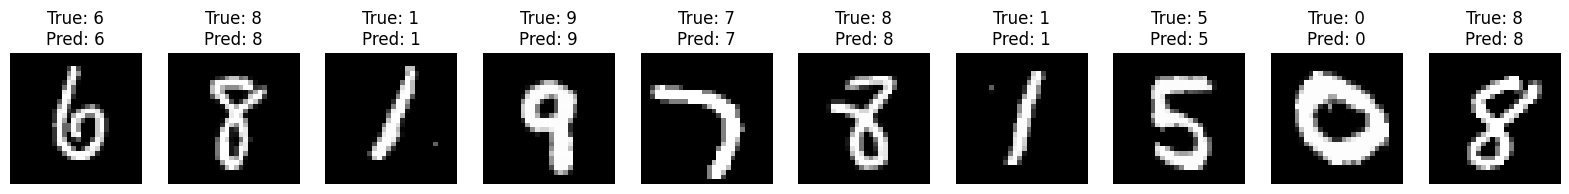

Incorrectly Classified Examples:


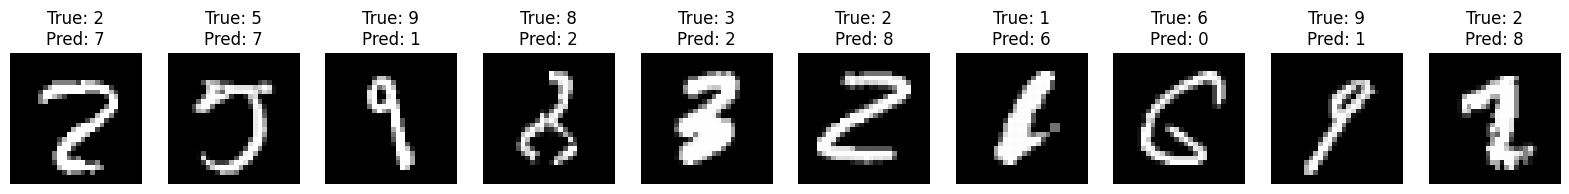

In [51]:
# Function to display a row of images with their predicted and true labels
def show_images(images, labels, preds, title):
  fig, axes = plt.subplots(1, 10, figsize=(20, 2)) # Create a row of 10 subplots
  for i in range(10):
    axes[i].imshow(images[i].squeeze(), cmap='gray') # Display the image
    axes[i].set_title(f'True: {labels[i]}\nPred: {preds[i]}')
    axes[i].axis('off') # Hide axis
  fig.suptitle(title, fontsize=16)
  plt.show()

# Set the model to evaluation mode
model.eval()
# Collecting correctly and incorrectly classified images
correct_examples = []
incorrect_examples = []

with torch.no_grad():
  for images, labels in test_loader:
    outputs = model(images)
    _, predicted = torch.max(outputs.data, 1)
    for img, label, pred in zip(images, labels, predicted):
      # Check if the prediction is correct or incorrect
      if label == pred and len(correct_examples) < 10:
        correct_examples.append((img, label.item(), pred.item()))
      elif label != pred and len(incorrect_examples) < 10:
        incorrect_examples.append((img, label.item(), pred.item()))

      # Break if we have collected enough examples
      if len(correct_examples) >= 10 and len(incorrect_examples) >= 10:
        break
    if len(correct_examples) >= 10 and len(incorrect_examples) >= 10:
      break

# Prepare data for visualization
correct_images = [img for img, _, _ in correct_examples]
correct_labels = [label for _, label, _ in correct_examples]
correct_preds = [pred for _, _, pred in correct_examples]
incorrect_images = [img for img, _, _ in incorrect_examples]
incorrect_labels = [label for _, label, _ in incorrect_examples]
incorrect_preds = [pred for _, _, pred in incorrect_examples]
# Visualizing Correctly Classified Images
print("Correctly Classified Examples:")
show_images(correct_images, correct_labels, correct_preds, title='')
# Visualizing Incorrectly Classified Images
print("Incorrectly Classified Examples:")
show_images(incorrect_images, incorrect_labels, incorrect_preds, title='')


### Confusion Matrix

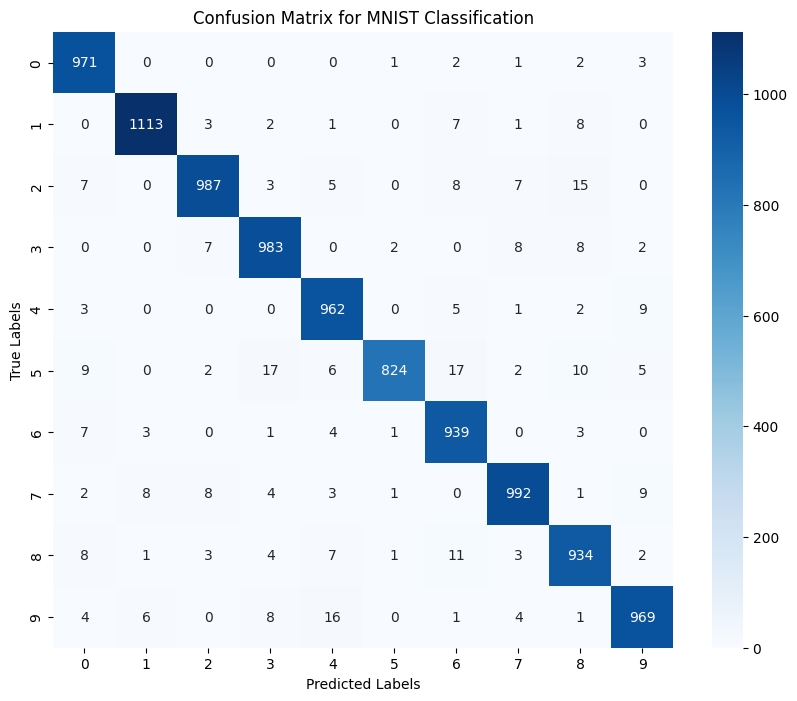

In [52]:
# Initialize the confusion matrix
confusion_mat = np.zeros((num_classes, num_classes))

# Set the model to evaluation mode
model.eval()

# Collect true labels and predictions
all_labels = []

all_preds = []

with torch.no_grad():
  for images, labels in test_loader:
    outputs = model(images)
    _, predicted = torch.max(outputs.data, 1)
    all_labels.extend(labels.cpu().numpy())
    all_preds.extend(predicted.cpu().numpy())

# Calculate the confusion matrix
confusion_mat = confusion_matrix(all_labels, all_preds)

# Plotting the confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(confusion_mat, annot=True, fmt='d', cmap='Blues',xticklabels=range(10), yticklabels=range(10))
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix for MNIST Classification')
plt.show()